<a href="https://colab.research.google.com/github/nananana25/MSI140/blob/main/MIS140A1_Praba_200000072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD THE DATASET

Import Libraries

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:

df = pd.read_csv('/content/MIS140_GlideWise360_data.csv')
display(df)

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
0,101012011.00,SM-10,1/1/2011,2011,Jan,0,red,Clear,3.30,3,81,0,Winter,Yes,Saturday,No,13,NaN,16
1,201012011.00,SM-11,1/1/2011,2011,Jan,1,black,Clear,2.30,2,80,0,Winter,Yes,Saturday,No,32,8.00,40
2,301012011.00,SM-02,1/1/2011,2011,Jan,2,blue,Clear,2.30,2,80,0,Winter,Yes,Saturday,No,27,5.00,32
3,401012011.00,SM-02,1/1/2011,2011,Jan,3,green,Clear,3.30,3,75,0,Winter,Yes,Saturday,No,10,3.00,13
4,501012011.00,SM-09,1/1/2011,2011,Jan,4,black,Clear,3.30,3,75,0,Winter,Yes,Saturday,No,1,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,864000000000.00,SM-11,31/12/2011,2011,Dec,19,purple,Clear,11.70,12,54,15,Winter,No,Saturday,No,73,19.00,92
8641,864000000000.00,SM-06,31/12/2011,2011,Dec,20,white,Clear,11.70,12,54,15,Winter,No,Saturday,No,63,8.00,71
8642,864000000000.00,SM-10,31/12/2011,2011,Dec,21,green,Clear,10.80,11,58,13,Winter,No,Saturday,No,50,2.00,52
8643,864000000000.00,SM-12,31/12/2011,2011,Dec,22,green,Clear,9.90,10,62,9,Winter,No,Saturday,No,36,2.00,38


In [166]:
print(df.shape)

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

(8645, 19)
Number of rows: 8645
Number of columns: 19


# INSPECT DATA

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RecordID                     8645 non-null   float64
 1   Shift_Manager_Code           8645 non-null   object 
 2   Date                         8645 non-null   object 
 3   Year                         8645 non-null   int64  
 4   Month                        8645 non-null   object 
 5   Hour                         8645 non-null   int64  
 6   Session_colour               8532 non-null   object 
 7   Weather_Outcast              8645 non-null   object 
 8   Temperature_Celsius          8645 non-null   float64
 9   Feeling_Temperature_Celsius  8645 non-null   int64  
 10  Humidity_Percent             8645 non-null   int64  
 11  Wind_Speed_kph               8645 non-null   int64  
 12  Season                       8645 non-null   object 
 13  Public_Holiday    

In [168]:
# Missing values
df.isna().sum()

,0
RecordID,0
Shift_Manager_Code,0
Date,0
Year,0
Month,0
Hour,0
Session_colour,113
Weather_Outcast,0
Temperature_Celsius,0
Feeling_Temperature_Celsius,0


In [169]:
df.head()

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
0,101012011.00,SM-10,1/1/2011,2011,Jan,0,red,Clear,3.30,3,81,0,Winter,Yes,Saturday,No,13,NaN,16
1,201012011.00,SM-11,1/1/2011,2011,Jan,1,black,Clear,2.30,2,80,0,Winter,Yes,Saturday,No,32,8.00,40
2,301012011.00,SM-02,1/1/2011,2011,Jan,2,blue,Clear,2.30,2,80,0,Winter,Yes,Saturday,No,27,5.00,32
3,401012011.00,SM-02,1/1/2011,2011,Jan,3,green,Clear,3.30,3,75,0,Winter,Yes,Saturday,No,10,3.00,13
4,501012011.00,SM-09,1/1/2011,2011,Jan,4,black,Clear,3.30,3,75,0,Winter,Yes,Saturday,No,1,0.00,1


# CLEAN DATA

In [170]:
df = df.dropna(subset=['Session_colour', 'Casual_User_Count'])

In [171]:
# Convert df['Date'] to datetime64[ns]
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='raise')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8447 entries, 1 to 8644
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   RecordID                     8447 non-null   float64       
 1   Shift_Manager_Code           8447 non-null   object        
 2   Date                         8447 non-null   datetime64[ns]
 3   Year                         8447 non-null   int64         
 4   Month                        8447 non-null   object        
 5   Hour                         8447 non-null   int64         
 6   Session_colour               8447 non-null   object        
 7   Weather_Outcast              8447 non-null   object        
 8   Temperature_Celsius          8447 non-null   float64       
 9   Feeling_Temperature_Celsius  8447 non-null   int64         
 10  Humidity_Percent             8447 non-null   int64         
 11  Wind_Speed_kph               8447 non-null   int

In [173]:
# Verify missing value are removed
df.isna().sum()

,0
RecordID,0
Shift_Manager_Code,0
Date,0
Year,0
Month,0
Hour,0
Session_colour,0
Weather_Outcast,0
Temperature_Celsius,0
Feeling_Temperature_Celsius,0


In [174]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print(df)

            RecordID Shift_Manager_Code       Date  Year Month  Hour  \
1       201012011.00              SM-11 2011-01-01  2011   Jan     1   
2       301012011.00              SM-02 2011-01-01  2011   Jan     2   
3       401012011.00              SM-02 2011-01-01  2011   Jan     3   
4       501012011.00              SM-09 2011-01-01  2011   Jan     4   
5       601012011.00              SM-12 2011-01-01  2011   Jan     5   
...              ...                ...        ...   ...   ...   ...   
8640 864000000000.00              SM-11 2011-12-31  2011   Dec    19   
8641 864000000000.00              SM-06 2011-12-31  2011   Dec    20   
8642 864000000000.00              SM-10 2011-12-31  2011   Dec    21   
8643 864000000000.00              SM-12 2011-12-31  2011   Dec    22   
8644 865000000000.00              SM-07 2011-12-31  2011   Dec    23   

     Session_colour  Weather_Outcast  Temperature_Celsius  \
1             black            Clear                 2.30   
2            

In [175]:
df

,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
1,201012011.00,SM-11,2011-01-01,2011,Jan,1,black,Clear,2.30,2,80,0,Winter,Yes,Saturday,No,32,8.00,40
2,301012011.00,SM-02,2011-01-01,2011,Jan,2,blue,Clear,2.30,2,80,0,Winter,Yes,Saturday,No,27,5.00,32
3,401012011.00,SM-02,2011-01-01,2011,Jan,3,green,Clear,3.30,3,75,0,Winter,Yes,Saturday,No,10,3.00,13
4,501012011.00,SM-09,2011-01-01,2011,Jan,4,black,Clear,3.30,3,75,0,Winter,Yes,Saturday,No,1,0.00,1
5,601012011.00,SM-12,2011-01-01,2011,Jan,5,black,Mist and Cloudy,3.30,1,75,6,Winter,Yes,Saturday,No,1,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,864000000000.00,SM-11,2011-12-31,2011,Dec,19,purple,Clear,11.70,12,54,15,Winter,No,Saturday,No,73,19.00,92
8641,864000000000.00,SM-06,2011-12-31,2011,Dec,20,white,Clear,11.70,12,54,15,Winter,No,Saturday,No,63,8.00,71
8642,864000000000.00,SM-10,2011-12-31,2011,Dec,21,green,Clear,10.80,11,58,13,Winter,No,Saturday,No,50,2.00,52
8643,864000000000.00,SM-12,2011-12-31,2011,Dec,22,green,Clear,9.90,10,62,9,Winter,No,Saturday,No,36,2.00,38


UNIVARIATE ANALYSIS

Numerical Variables

In [176]:
df[['Rental_Bikes_Total','Registered_Member_Count','Casual_User_Count', 'Temperature_Celsius']].describe()


,Rental_Bikes_Total,Registered_Member_Count,Casual_User_Count,Temperature_Celsius
count,8447.00,8447.00,8447.00,8447.00
mean,143.55,114.96,46.86,14.96
std,133.60,109.20,388.67,9.33
min,1.00,0.00,-15.00,-7.10
25%,31.00,26.00,3.00,7.00
50%,109.00,90.00,14.00,15.50
75%,211.00,167.00,39.00,23.00
max,651.00,567.00,9999.00,85.00


Visualize Distribution

Histogram

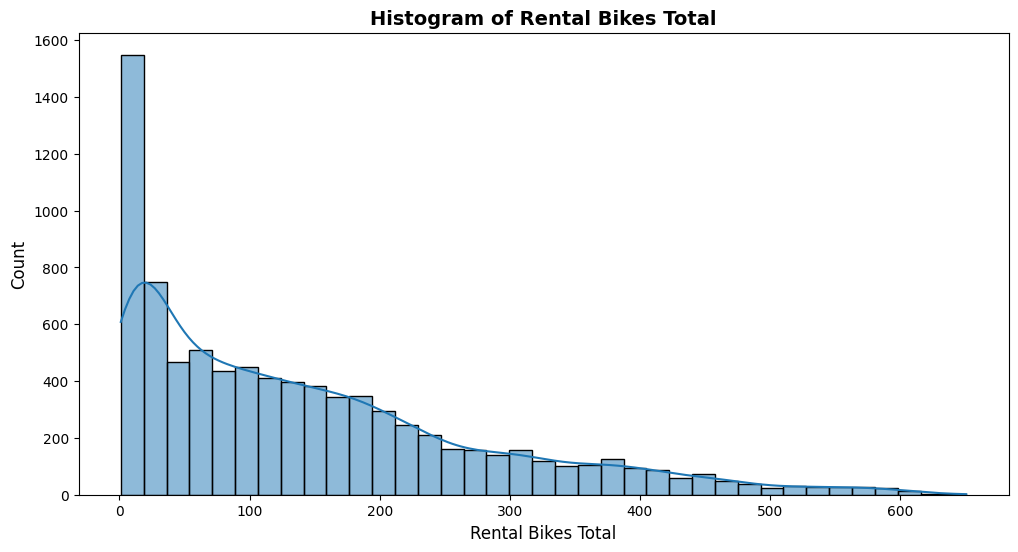

In [177]:
# Create a professional histogram of Rental Bikes Total
plt.figure(figsize=(12, 6))

# Plot the histogram for 'Rental_Bikes_Total' column
sns.histplot(data=df, x="Rental_Bikes_Total", kde=True)

# Set title and labels
plt.title("Histogram of Rental Bikes Total", fontsize=14, fontweight='bold')
plt.xlabel("Rental Bikes Total", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

Long tail on the right = mean > median

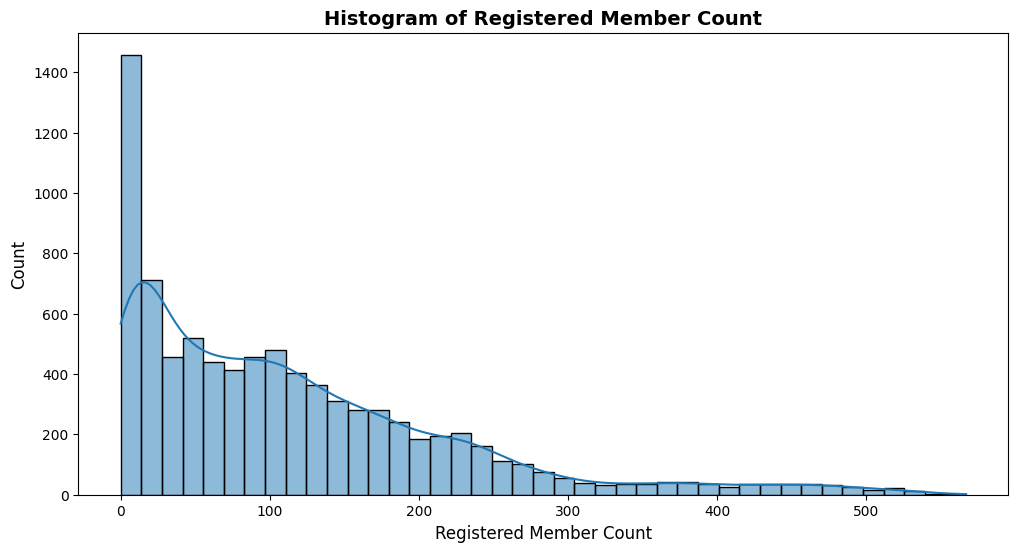

In [178]:
# Create a professional histogram of Rental Bikes Total
plt.figure(figsize=(12, 6))

# Plot the histogram for 'Rental_Bikes_Total' column
sns.histplot(data=df, x="Registered_Member_Count", kde=True)

# Set title and labels
plt.title("Histogram of Registered Member Count", fontsize=14, fontweight='bold')
plt.xlabel("Registered Member Count", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

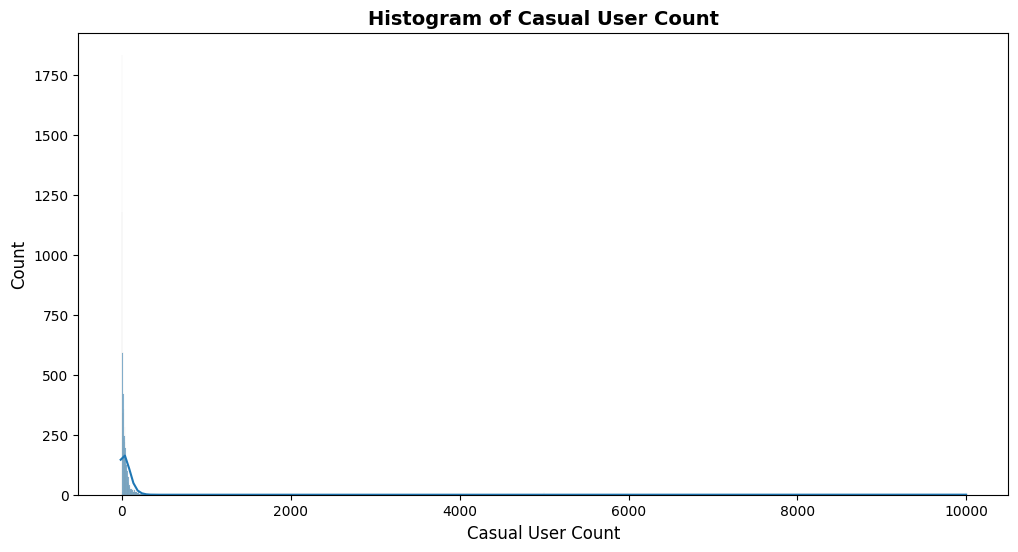

In [179]:
# Create a professional histogram of Casual User Count
plt.figure(figsize=(12, 6))

# Plot the histogram for 'Casual_User_Count' column
sns.histplot(data=df, x="Casual_User_Count", kde=True)

# Set title and labels
plt.title("Histogram of Casual User Count", fontsize=14, fontweight='bold')
plt.xlabel("Casual User Count", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

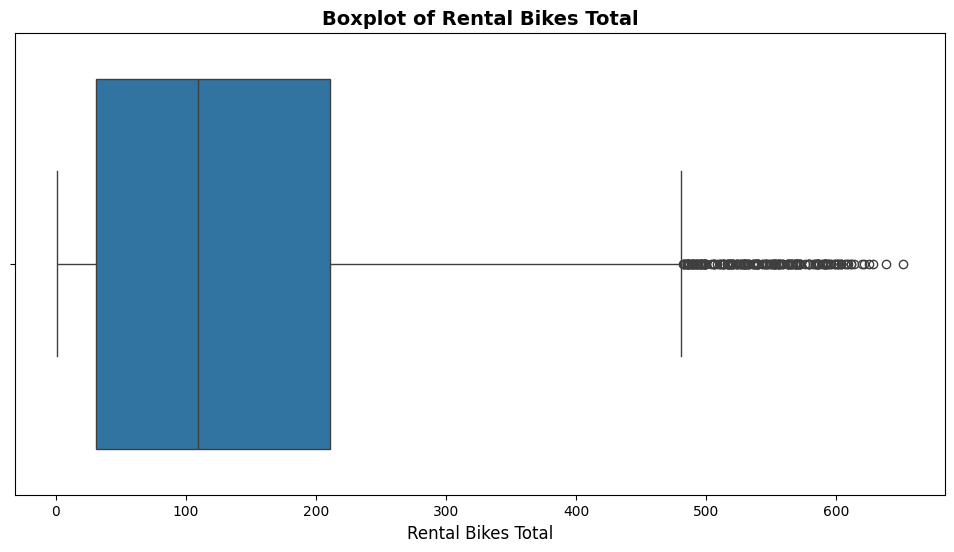

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Rental_Bikes_Total"])

# Set title and labels
plt.title("Boxplot of Rental Bikes Total", fontsize=14, fontweight='bold')
plt.xlabel("Rental Bikes Total", fontsize=12)

# Improve aesthetics
plt.grid(False)
plt.show()

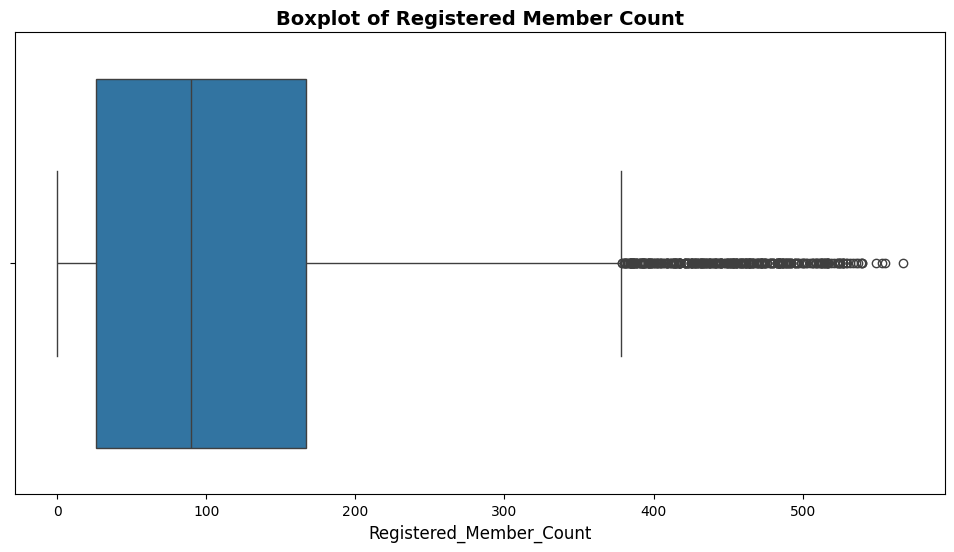

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Registered_Member_Count"])

# Set title and labels
plt.title("Boxplot of Registered Member Count", fontsize=14, fontweight='bold')
plt.xlabel("Registered_Member_Count", fontsize=12)

# Improve aesthetics
plt.grid(False)
plt.show()

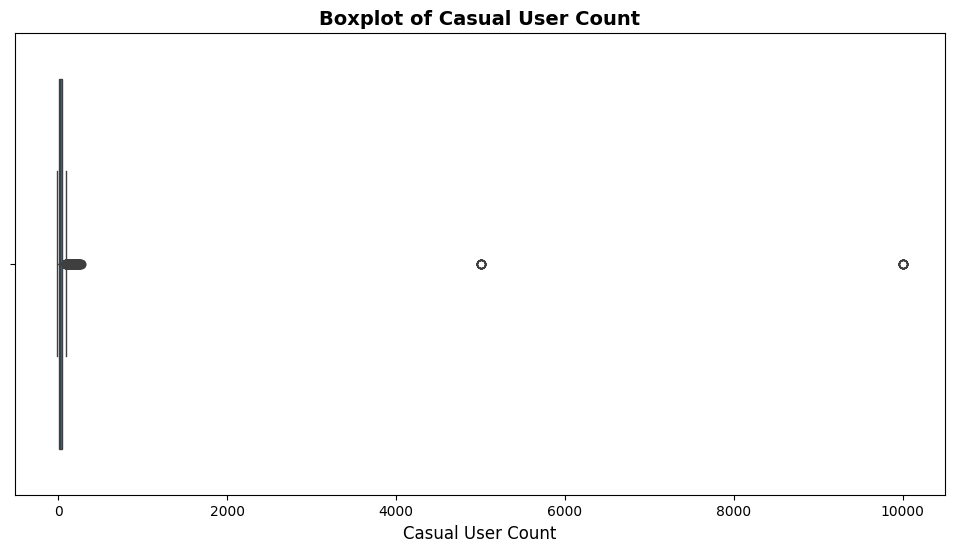

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Casual_User_Count"])

# Set title and labels
plt.title("Boxplot of Casual User Count", fontsize=14, fontweight='bold')
plt.xlabel("Casual User Count", fontsize=12)

# Improve aesthetics
plt.grid(False)
plt.show()

Identify outliers using IQR methods

In [183]:
# IQR methods
# Compute IQR for 'Rental_Bikes_Total'
Q1 = df['Rental_Bikes_Total'].quantile(0.25)
Q3 = df['Rental_Bikes_Total'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Rental_Bikes_Total'] < lower_bound) | (df['Rental_Bikes_Total'] > upper_bound)]

# Display the number of outliers detected
num_outliers = outliers.shape[0]

# Show the summary and a few outliers
print(f'Any Rental_Bikes_Total < {lower_bound:.2f} or Rental_Bikes_Total > {upper_bound:.2f} are identified as outliers')
print(f'Number of outliers in Rental_Bikes_Total column: {num_outliers}')
print('Some sample outliers')
outliers

Any Rental_Bikes_Total < -239.00 or Rental_Bikes_Total > 481.00 are identified as outliers
Number of outliers in Rental_Bikes_Total column: 206
Some sample outliers


,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
2659,266000000000.00,SM-10,2011-04-25,2011,Apr,17,green,Clear,24.90,27,54,20,Spring,No,Monday,yes,441,80.00,521
2660,266000000000.00,SM-10,2011-04-25,2011,Apr,18,red,Clear,24.00,26,57,24,Spring,No,Monday,yes,425,74.00,499
2683,268000000000.00,SM-01,2011-04-26,2011,Apr,17,yellow,Clear,24.00,26,61,24,Spring,No,Tuesday,yes,455,66.00,521
2684,269000000000.00,SM-06,2011-04-26,2011,Apr,18,white,Clear,24.00,26,65,30,Spring,No,Tuesday,yes,463,65.00,528
2707,271000000000.00,SM-13,2011-04-27,2011,Apr,17,purple,Light Rain or Snow,23.00,24,83,26,Spring,No,Wednesday,yes,458,63.00,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,735000000000.00,SM-14,2011-11-07,2011,Nov,17,red,Clear,15.50,16,45,11,Autumn,No,Monday,yes,489,39.00,528
7370,737000000000.00,SM-09,2011-11-08,2011,Nov,17,yellow,Clear,16.40,17,43,11,Autumn,No,Tuesday,yes,459,40.00,499
7394,740000000000.00,SM-12,2011-11-09,2011,Nov,17,black,Clear,13.60,14,63,7,Autumn,No,Wednesday,yes,458,27.00,485
7514,752000000000.00,SM-09,2011-11-14,2011,Nov,17,red,Clear,21.10,25,46,17,Autumn,No,Monday,yes,464,55.00,519


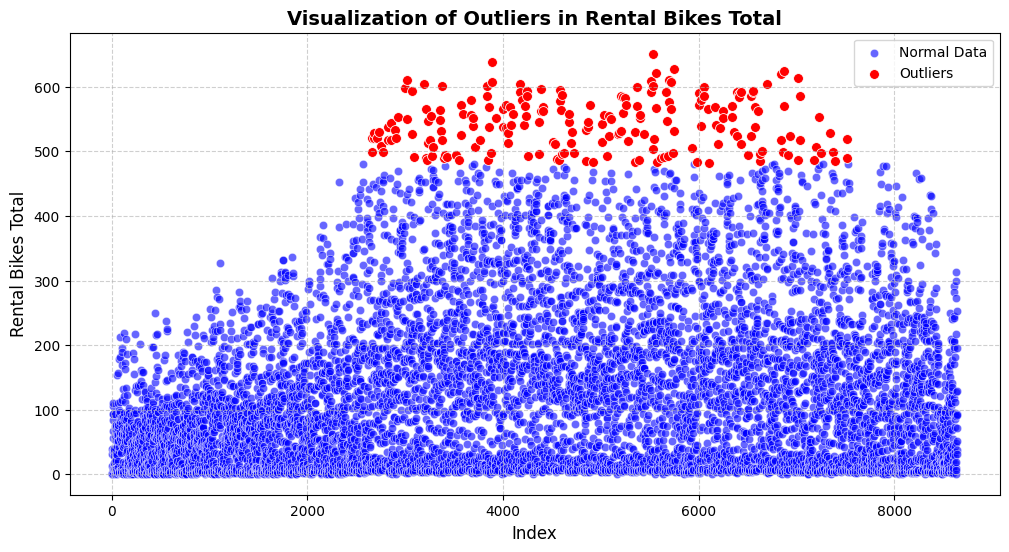

In [184]:
plt.figure(figsize=(12, 6))

# Plot all data points
sns.scatterplot(data=df, x=df.index, y='Rental_Bikes_Total', color='blue', alpha=0.6, label='Normal Data')

# Overlay outliers with a different color
sns.scatterplot(data=outliers, x=outliers.index, y='Rental_Bikes_Total', color='red', s=50, label='Outliers')

# Set title and labels
plt.title("Visualization of Outliers in Rental Bikes Total", fontsize=14, fontweight='bold')
plt.xlabel("Index", fontsize=12)
plt.ylabel("Rental Bikes Total", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [185]:
# IQR methods for 'Casual_User_Count'
# Compute IQR for 'Casual_User_Count'
Q1_casual = df['Casual_User_Count'].quantile(0.25)
Q3_casual = df['Casual_User_Count'].quantile(0.75)
IQR_casual = Q3_casual - Q1_casual

# Define lower and upper bounds for outliers
lower_bound_casual = Q1_casual - 1.5 * IQR_casual
upper_bound_casual = Q3_casual + 1.5 * IQR_casual

# Identify outliers
outliers_casual = df[(df['Casual_User_Count'] < lower_bound_casual) | (df['Casual_User_Count'] > upper_bound_casual)]

# Display the number of outliers detected
num_outliers_casual = outliers_casual.shape[0]

# Show the summary and a few outliers
print(f'Any Casual_User_Count < {lower_bound_casual:.2f} or Casual_User_Count > {upper_bound_casual:.2f} are identified as outliers')
print(f'Number of outliers in Casual_User_Count column: {num_outliers_casual}')
print('Some sample outliers:')
outliers_casual

Any Casual_User_Count < -51.00 or Casual_User_Count > 93.00 are identified as outliers
Number of outliers in Casual_User_Count column: 592
Some sample outliers:


,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
396,39718012011.00,SM-09,2011-01-18,2011,Jan,12,purple,Mist and Cloudy,1.40,-4,86,22,Winter,No,Tuesday,yes,3,5000.00,3
665,66631012011.00,SM-08,2011-01-31,2011,Jan,1,white,Clear,2.30,-2,64,17,Winter,No,Monday,yes,5,5000.00,7
780,78104022011.00,SM-03,2011-02-04,2011,Feb,23,red,Mist and Cloudy,3.30,0,70,9,Winter,No,Friday,yes,30,9999.00,31
1124,113000000000.00,SM-04,2011-02-19,2011,Feb,14,green,Clear,13.60,14,15,44,Winter,No,Saturday,No,94,102.00,196
1147,115000000000.00,SM-12,2011-02-20,2011,Feb,14,black,Clear,8.90,7,27,11,Winter,No,Sunday,No,104,108.00,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,783000000000.00,SM-09,2011-11-27,2011,Nov,15,white,Clear,21.10,25,43,19,Autumn,No,Sunday,No,221,96.00,317
7825,783000000000.00,SM-02,2011-11-27,2011,Nov,16,yellow,Clear,18.30,19,52,17,Autumn,No,Sunday,No,229,94.00,323
7967,797000000000.00,SM-04,2011-12-03,2011,Dec,15,white,Clear,9.90,10,46,0,Autumn,No,Saturday,No,237,100.00,337
8634,864000000000.00,SM-05,2011-12-31,2011,Dec,13,yellow,Clear,15.50,16,42,33,Winter,No,Saturday,No,205,108.00,313


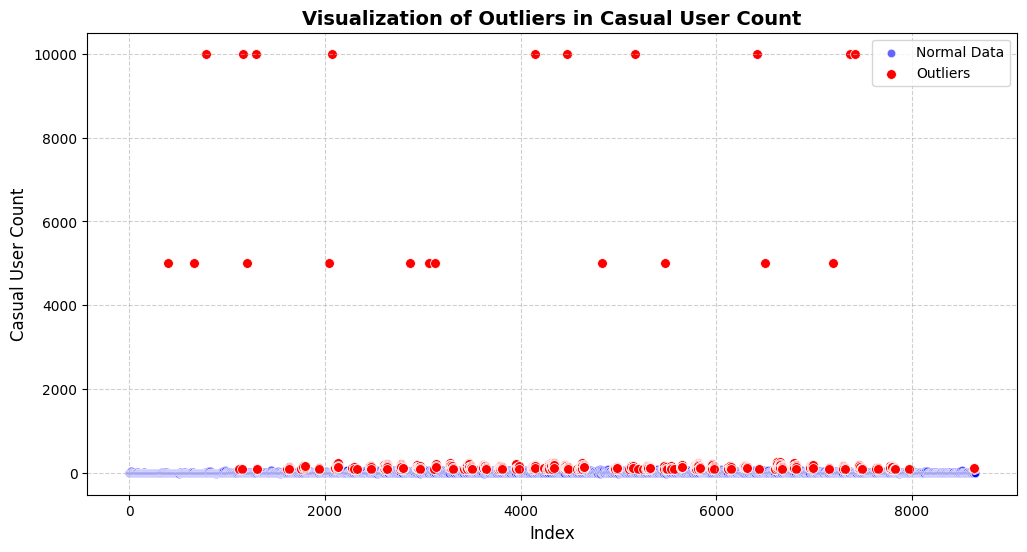

In [186]:
plt.figure(figsize=(12, 6))

# Plot all data points
sns.scatterplot(data=df, x=df.index, y='Casual_User_Count', color='blue', alpha=0.6, label='Normal Data')

# Overlay outliers with a different color
sns.scatterplot(data=outliers_casual, x=outliers_casual.index, y='Casual_User_Count', color='red', s=50, label='Outliers')

# Set title and labels
plt.title("Visualization of Outliers in Casual User Count", fontsize=14, fontweight='bold')
plt.xlabel("Index", fontsize=12)
plt.ylabel("Casual User Count", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [187]:
# IQR methods
# Compute IQR for 'Registered_Member_Count'
Q1 = df['Registered_Member_Count'].quantile(0.25)
Q3 = df['Registered_Member_Count'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Registered_Member_Count'] < lower_bound) | (df['Registered_Member_Count'] > upper_bound)]

# Display the number of outliers detected
num_outliers = outliers.shape[0]

# Show the summary and a few outliers
print(f'Any Registered_Member_Count < {lower_bound:.2f} or Registered_Member_Count > {upper_bound:.2f} are identified as outliers')
print(f'Number of outliers in Registered_Member_Count column: {num_outliers}')
print('Some sample outliers')
outliers

Any Registered_Member_Count < -185.50 or Registered_Member_Count > 378.50 are identified as outliers
Number of outliers in Registered_Member_Count column: 338
Some sample outliers


,RecordID,Shift_Manager_Code,Date,Year,Month,Hour,Session_colour,Weather_Outcast,Temperature_Celsius,Feeling_Temperature_Celsius,Humidity_Percent,Wind_Speed_kph,Season,Public_Holiday,Week_Day,Business_Day,Registered_Member_Count,Casual_User_Count,Rental_Bikes_Total
2539,254000000000.00,SM-02,2011-04-20,2011,Apr,17,green,Mist and Cloudy,26.80,27,37,28,Spring,No,Wednesday,yes,398,34.00,432
2540,254000000000.00,SM-04,2011-04-20,2011,Apr,18,red,Clear,26.80,27,30,24,Spring,No,Wednesday,yes,385,56.00,441
2563,256000000000.00,SM-07,2011-04-21,2011,Apr,17,yellow,Clear,15.50,16,29,11,Spring,No,Thursday,yes,402,79.00,481
2564,257000000000.00,SM-08,2011-04-21,2011,Apr,18,white,Clear,15.50,16,25,19,Spring,No,Thursday,yes,381,71.00,452
2659,266000000000.00,SM-10,2011-04-25,2011,Apr,17,green,Clear,24.90,27,54,20,Spring,No,Monday,yes,441,80.00,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8344,835000000000.00,SM-13,2011-12-19,2011,Dec,8,black,Clear,1.40,-3,75,13,Autumn,No,Monday,yes,389,8.00,397
8368,837000000000.00,SM-12,2011-12-20,2011,Dec,8,grey,Mist and Cloudy,11.70,12,54,6,Autumn,No,Tuesday,yes,422,10.00,432
8377,838000000000.00,SM-05,2011-12-20,2011,Dec,17,white,Clear,10.80,11,62,11,Autumn,No,Tuesday,yes,417,14.00,431
8378,838000000000.00,SM-02,2011-12-20,2011,Dec,18,yellow,Clear,9.90,10,66,13,Autumn,No,Tuesday,yes,385,26.00,411


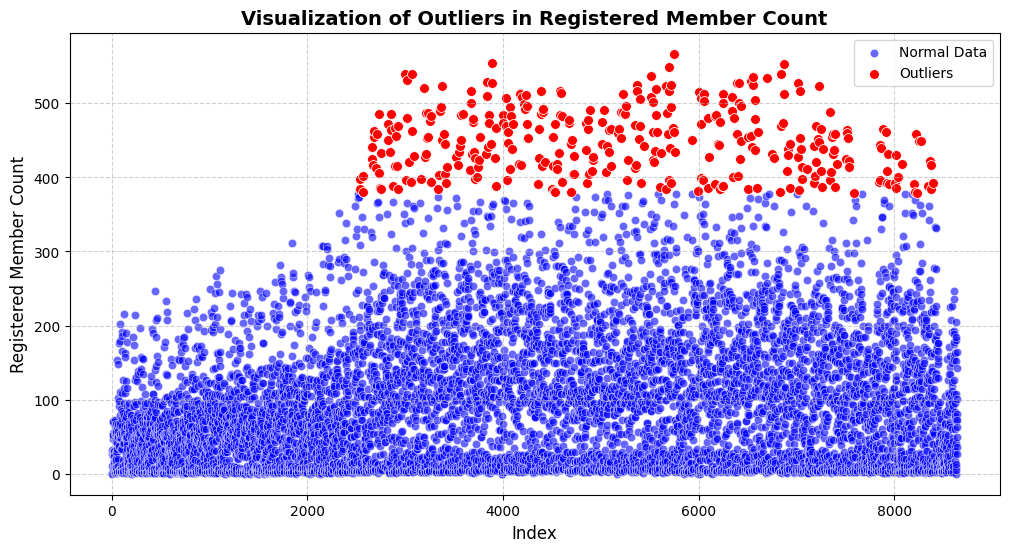

In [188]:
plt.figure(figsize=(12, 6))

# Plot all data points
sns.scatterplot(data=df, x=df.index, y='Registered_Member_Count', color='blue', alpha=0.6, label='Normal Data')

# Overlay outliers with a different color
sns.scatterplot(data=outliers, x=outliers.index, y='Registered_Member_Count', color='red', s=50, label='Outliers')

# Set title and labels
plt.title("Visualization of Outliers in Registered Member Count", fontsize=14, fontweight='bold')
plt.xlabel("Index", fontsize=12)
plt.ylabel("Registered Member Count", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [189]:
df[['Rental_Bikes_Total','Registered_Member_Count','Casual_User_Count']].describe()


,Rental_Bikes_Total,Registered_Member_Count,Casual_User_Count
count,8447.00,8447.00,8447.00
mean,143.55,114.96,46.86
std,133.60,109.20,388.67
min,1.00,0.00,-15.00
25%,31.00,26.00,3.00
50%,109.00,90.00,14.00
75%,211.00,167.00,39.00
max,651.00,567.00,9999.00


In [194]:
(df['Rental_Bikes_Total'] ==
 df['Registered_Member_Count'] + df['Casual_User_Count']).all()


np.False_

# CATEGORICAL DATA

# BIVARIATE ANALYSIS

Comparison between casual and registered users

/tmp/ipython-input-3787131946.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Registered_Member_Count'],


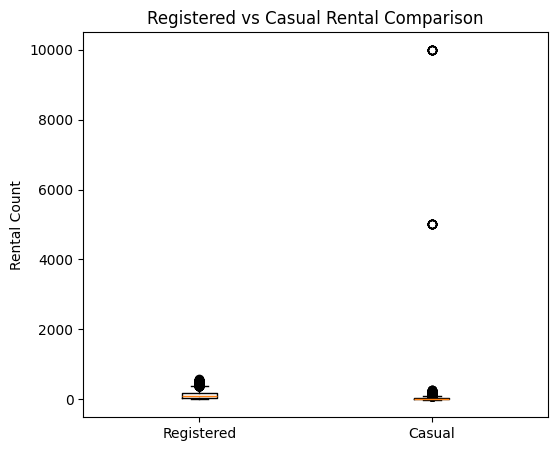

In [191]:
plt.figure(figsize=(6,5))

plt.boxplot([df['Registered_Member_Count'],
             df['Casual_User_Count']],
            labels=['Registered', 'Casual'])

plt.title('Registered vs Casual Rental Comparison')
plt.ylabel('Rental Count')
plt.show()

Registered Users (left box): This boxplot shows that registered members generally have higher rental counts. The box itself represents the interquartile range (IQR), with the line inside indicating the median rental count. The 'whiskers' extend to show the range of the data, excluding outliers, which are plotted as individual points.
Casual Users (right box): In contrast, casual users generally have lower rental counts. Their median is significantly lower, and the overall spread of their rental counts is also smaller, although there are still some outliers indicating occasional high rental activity.
In summary, the boxplot clearly indicates that registered members contribute significantly more to the total bike rentals and show a wider range of rental activity compared to casual users.

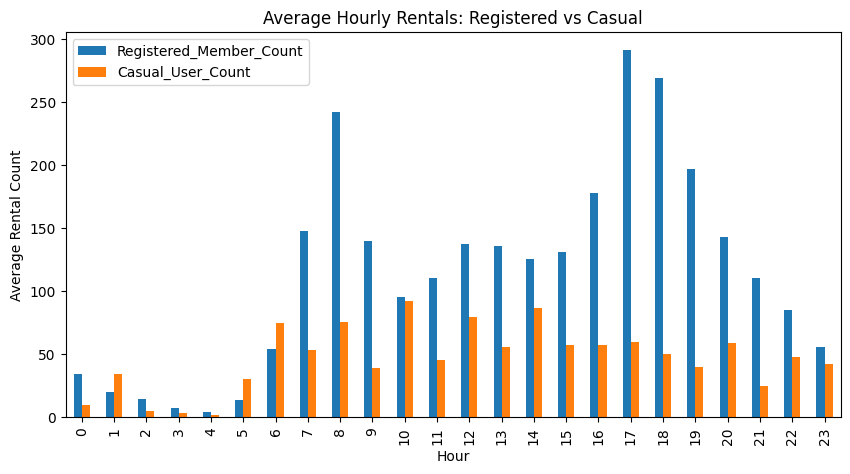

In [192]:
hourly_avg = df.groupby('Hour')[['Registered_Member_Count',
                                  'Casual_User_Count']].mean()

hourly_avg.plot(kind='bar', figsize=(10,5))
plt.title('Average Hourly Rentals: Registered vs Casual')
plt.ylabel('Average Rental Count')
plt.show()

Registered Member Usage: Registered members show a relatively low number of rentals during late night and early morning hours (0-4 AM). Their usage starts to pick up significantly around 5-6 AM, with a clear peak during the morning commute hours (around 7-8 AM). We can expect another peak during evening commute hours, which would be visible in the full dataset. Registered users consistently have higher average rental counts than casual users for most hours, especially during peak commute times.

Casual User Usage: Casual users also have low rental counts in the very early morning. Interestingly, casual user rentals are notably higher than registered users in the very early morning (around 1 AM) and also around 5-6 AM. However, their overall average rental counts are generally lower than registered members during most other hours.

Hourly Fluctuations: Both user types exhibit clear hourly fluctuations, suggesting a strong correlation with daily routines. Registered members tend to dominate during structured hours, likely for commuting, while casual users show some activity during off-peak and early morning hours, possibly for leisure or less routine travel.

In summary, the data highlights distinct usage patterns between registered and casual users, with registered members being the primary drivers of rentals during peak hours.

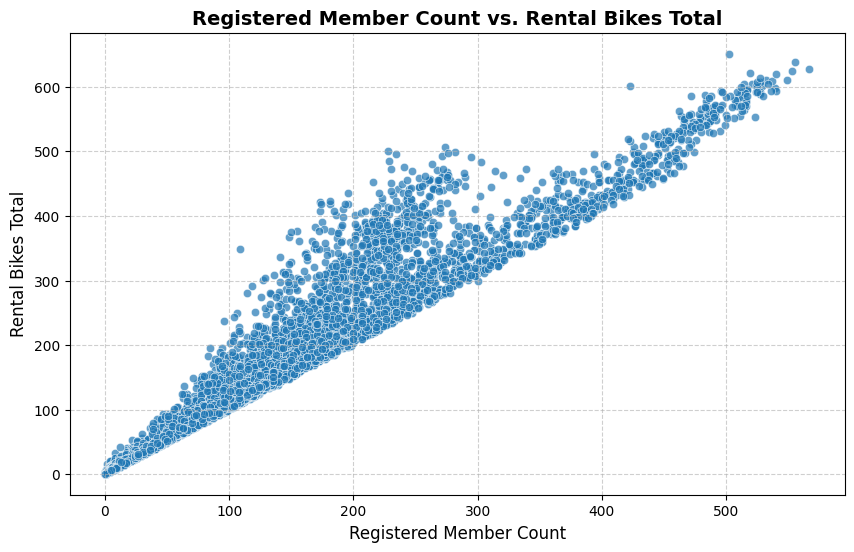

In [193]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Registered_Member_Count', y='Rental_Bikes_Total', alpha=0.7)
plt.title('Registered Member Count vs. Rental Bikes Total', fontsize=14, fontweight='bold')
plt.xlabel('Registered Member Count', fontsize=12)
plt.ylabel('Rental Bikes Total', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Positive Correlation: The plot generally shows a strong positive correlation. As the number of Registered_Member_Count increases, the Rental_Bikes_Total also tends to increase. This suggests that a higher number of registered members leads to more total bike rentals.
Spread of Data: For lower Registered_Member_Count values, the Rental_Bikes_Total is also generally low and has a smaller spread. As the Registered_Member_Count grows, the Rental_Bikes_Total not only increases but also shows a wider range, indicating more variability in total rentals when there are more registered members.
Linearity: The relationship appears to be somewhat linear, particularly in the lower to mid-ranges of registered members.
In summary, the scatter plot effectively demonstrates that registered members are a significant driver of total bike rentals, with more registered members correlating with higher overall bike usage.